# Synthetic Data Examples

In [ ]:
# Uncomment the following line when running on Google Colab
# !pip install "autora[synthetic-data]" --pre

Load the Weber-Fechner Law:

In [ ]:
import numpy as np
from autora.synthetic.psychophysics.weber_fechner_law import weber_fechner_law
s = weber_fechner_law(random_state=None)

Check the docstring to get information about the model

In [ ]:
help(weber_fechner_law)

Help on function weber_fechner_law in module autora.synthetic.psychophysics.weber_fechner_law:

weber_fechner_law(name='Weber-Fechner Law', resolution=100, constant=1.0, maximum_stimulus_intensity=5.0, added_noise=0.01, random_state: Optional[int] = None)
    Weber-Fechner Law
    
    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus 1 and 2
        constant: constant multiplier
        maximum_stimulus_intensity: maximum value for stimulus 1 and 2
        added_noise: standard deviation of normally distributed noise added to y-values
        random_state: integer used to seed the random number generator



... or use the describe function:

In [ ]:
from autora.synthetic.utilities import describe

print(describe(s))


    Weber-Fechner Law

    Args:
        name: name of the experiment
        resolution: number of allowed values for stimulus 1 and 2
        constant: constant multiplier
        maximum_stimulus_intensity: maximum value for stimulus 1 and 2
        added_noise: standard deviation of normally distributed noise added to y-values
        random_state: integer used to seed the random number generator

    


The synthetic experiement `s` has properties like the name of the experiment:

In [ ]:
s.name

'Weber-Fechner Law'

... a valid metadata description:

In [ ]:
s.variables

VariableCollection(independent_variables=[IV(name='S1', value_range=(0.01, 5.0), allowed_values=array([0.01      , 0.06040404, 0.11080808, 0.16121212, 0.21161616,
       0.2620202 , 0.31242424, 0.36282828, 0.41323232, 0.46363636,
       0.5140404 , 0.56444444, 0.61484848, 0.66525253, 0.71565657,
       0.76606061, 0.81646465, 0.86686869, 0.91727273, 0.96767677,
       1.01808081, 1.06848485, 1.11888889, 1.16929293, 1.21969697,
       1.27010101, 1.32050505, 1.37090909, 1.42131313, 1.47171717,
       1.52212121, 1.57252525, 1.62292929, 1.67333333, 1.72373737,
       1.77414141, 1.82454545, 1.87494949, 1.92535354, 1.97575758,
       2.02616162, 2.07656566, 2.1269697 , 2.17737374, 2.22777778,
       2.27818182, 2.32858586, 2.3789899 , 2.42939394, 2.47979798,
       2.53020202, 2.58060606, 2.6310101 , 2.68141414, 2.73181818,
       2.78222222, 2.83262626, 2.8830303 , 2.93343434, 2.98383838,
       3.03424242, 3.08464646, 3.13505051, 3.18545455, 3.23585859,
       3.28626263, 3.33666667, 3.

... a function to generate the full domain of the data (if possible)

In [ ]:
x = s.domain()
x

array([[0.01      , 0.01      ],
       [0.01      , 0.06040404],
       [0.01      , 0.11080808],
       ...,
       [4.94959596, 4.94959596],
       [4.94959596, 5.        ],
       [5.        , 5.        ]])

... the experiment_runner runner which can be called to generate experimental results:

In [ ]:
import numpy as np
y = s.experiment_runner(x)  # doctest: +ELLIPSIS
y

array([[-0.01151035],
       [ 1.80928791],
       [ 2.39218823],
       ...,
       [-0.02166646],
       [ 0.02474968],
       [ 0.01606803]])

... a function to plot the ground truth:

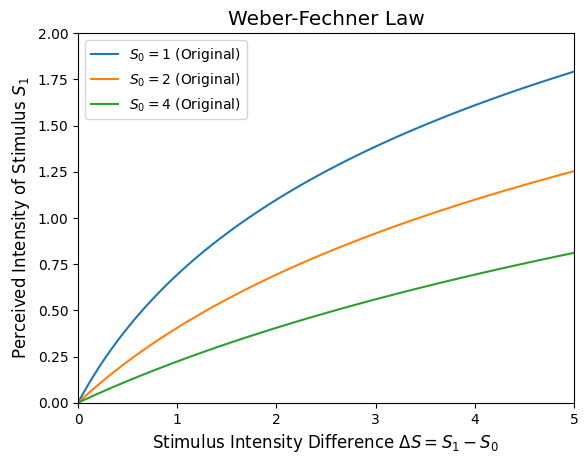

In [ ]:
s.plotter()

... against a fitted model if it exists:

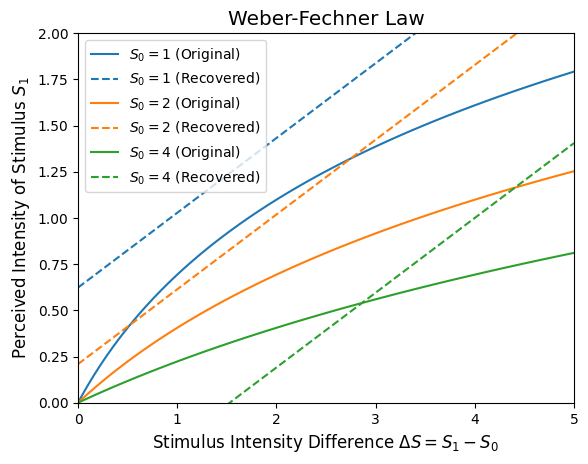

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)
s.plotter(model)

These can be used to run a full experimental cycle

In [ ]:
from autora.workflow.protocol import ResultKind
from autora.experimentalist.pipeline import make_pipeline
from autora.experimentalist.pooler.grid import grid_pool
from autora.experimentalist.sampler.random_sampler import random_sampler
from functools import partial
import random
variables = s.variables
pool = partial(grid_pool, ivs=variables.independent_variables)
random.seed(181) # set the seed for the random sampler
sampler = partial(random_sampler, n=20)
experimentalist_pipeline = make_pipeline([pool, sampler])

from autora.workflow import Controller
theorist = LinearRegression()

cycle = Controller(
    variables=variables, experimentalist=experimentalist_pipeline,
    experiment_runner=s.experiment_runner, theorist=theorist,
    monitor=lambda s: (s.history[-1].kind == ResultKind.MODEL) and
                       print(f"finished cycle {len(s.models)}"))

c = cycle.run(10)
best_model = c.state.models[-1]
print(f"I = "
      f"{best_model.coef_[0]:.2f} S0 "
      f"{best_model.coef_[1]:+.2f} S1 "
      f"{best_model.intercept_:+.2f}")


finished cycle 1
finished cycle 2
finished cycle 3
I = -0.49 S0 +0.58 S1 -0.21
